In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<font size="4">
<strong>
Procedure
</strong>
</font>

After performing the classification, we can proceed with the recommendation part as follows:
We propose the first corresponding product with affordable risk for those clients classified as 1 (either in IncomeInvestment or AccumulationInvestment).
After this standard recommendation part, we will also propose products (those with the lowest risks) to clients classified as 0 in both labels,
to suggest them an investment alternative, hoping they might find it attractive and decide to buy it even if they do not have the typical features of a buyer.


<font size="4">
<strong>
Possible future improvements
</strong>
</font>

One possible way of proceeding in the work could be to collect data about the recommended products and, as a consequence, update the recommendation strategy based on customer satisfaction indices.
Un possibile modo di procedere nel lavoro potrebbe essere quello di raccogliere dati sui prodotti consigliati e, di conseguenza, aggiornare la strategia di raccomandazione basata sugli indici di gradimento dei clienti.







# Recommendation

In [2]:
# Products dataset
df_products = pd.read_excel('Needs.xls', sheet_name='Products')
df_products.head()

# Accumulation : 1
# Income : 0

,IDProduct,Type,Risk
0,1,1,0.55
1,2,0,0.30
2,3,0,0.12
3,4,0,0.44
4,5,1,0.41


## Accumulation Products Recommendation

### Basic

**Procedure**

Here is our basic recommendation system, in which we take into account the fact that, despite some clients being classified as 1, they have a very low propensity for risk.
Therefore, based on this indicator, we refrain from suggesting any products to these clients, denoting this as '-1' for the product ID.







In [3]:
dataset_with_predictions = pd.read_excel('AccumulationInvestment_Predicitons.xlsx')
dataset_with_predictions.head()

,Age,FinancialEducation,RiskPropensity,Income,Wealth,Income/Wealth,MLP AccumulationInvestment,RF AccumulationInvestment,LR AccumulationInvestment,KNN AccumulationInvestment,SVM AccumulationInvestment,GB AccumulationInvestment,DT+Ada AccumulationInvestment,NB AccumulationInvestment,XGB AccumulationInvestment,Bagging
0,0.518987,0.119366,0.166095,0.499077,0.447003,0.405424,1,0,1,1,1,0,0,1,0,0
1,0.759494,0.568503,0.617078,0.902076,0.764515,0.381090,1,1,1,1,1,1,1,1,1,1
2,0.582278,0.615310,0.398159,0.658283,0.661516,0.322413,0,1,1,1,1,1,0,1,1,1
3,0.582278,0.545493,0.482318,0.627178,0.580825,0.370585,1,1,1,1,1,1,1,1,1,1
4,0.341772,0.610581,0.531877,0.845886,0.595056,0.487633,1,1,1,1,1,1,1,1,1,1


In [4]:
def get_recommended_product_AccumulationBasic(row, product_df):
    if row['Bagging'] == 0:
        return None # Of course we can't recommended an accumulation product if the client doesn't want one
    else:
        # Ensure that filtering is done with appropriate conditions
        valid_products = product_df[(product_df['Type'] == 1) & (product_df['Risk'] <= row['RiskPropensity'])]
        if valid_products.empty:
             return -1
        else:
            # Find the product with the highest risk but still affordable for the client
            return valid_products.loc[valid_products['Risk'].idxmax(), 'IDProduct']

# Apply function to each row of 'dataset_with_predictions'
dataset_with_predictions['Basic recommended accumulation product'] = dataset_with_predictions.apply(lambda row: get_recommended_product_AccumulationBasic(row, df_products), axis=1)

# Show first lines to check
dataset_with_predictions.head()

,Age,FinancialEducation,RiskPropensity,Income,Wealth,Income/Wealth,MLP AccumulationInvestment,RF AccumulationInvestment,LR AccumulationInvestment,KNN AccumulationInvestment,SVM AccumulationInvestment,GB AccumulationInvestment,DT+Ada AccumulationInvestment,NB AccumulationInvestment,XGB AccumulationInvestment,Bagging,Basic recommended accumulation product
0,0.518987,0.119366,0.166095,0.499077,0.447003,0.405424,1,0,1,1,1,0,0,1,0,0,NaN
1,0.759494,0.568503,0.617078,0.902076,0.764515,0.381090,1,1,1,1,1,1,1,1,1,1,1.0
2,0.582278,0.615310,0.398159,0.658283,0.661516,0.322413,0,1,1,1,1,1,0,1,1,1,6.0
3,0.582278,0.545493,0.482318,0.627178,0.580825,0.370585,1,1,1,1,1,1,1,1,1,1,8.0
4,0.341772,0.610581,0.531877,0.845886,0.595056,0.487633,1,1,1,1,1,1,1,1,1,1,8.0


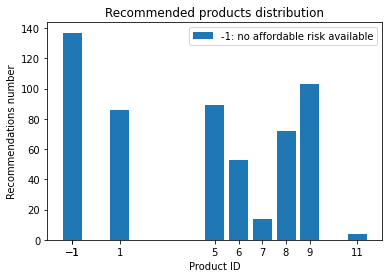

In [5]:
# Recommended products distribution
product_counts = dataset_with_predictions['Basic recommended accumulation product'].value_counts()

plt.bar(product_counts.index, product_counts.values)

plt.xlabel('Product ID')
plt.ylabel('Recommendations number')
plt.title('Recommended products distribution')

plt.xticks(list(product_counts.index) + [-1])
plt.legend(['-1: no affordable risk available'])

plt.show()

### Alternative

**Procedure**

One can notice that there are many clients with no suggested products. However, based on the classification results, these clients are inclined to invest. The only hindrance is their low risk propensity.
Here, adopting the perspective of a real-world bank, we attempt to suggest the product with the lowest risk indicator in the category (product with ID = 9) to clients with excessively low risk propensity.
It's possible that a client might find this product attractive despite their aversion to risk.







In [6]:
def get_recommended_product_AccumulationAlternative(row, product_df):
    if row['Bagging'] == 0:
        return None #Of course we can't recommended an accumulation product if the client doesn't want one
    else:
        # Ensure that filtering is done with appropriate conditions
        valid_products = product_df[(product_df['Type'] == 1) & (product_df['Risk'] < row['RiskPropensity'])]
        if valid_products.empty:
             #No valid type 1 products found within risk propensity, find closest risk above the client's risk propensity
             all_type_1_products = product_df[product_df['Type'] == 1]
             all_type_1_products['RiskDiff'] = abs(all_type_1_products['Risk'] - row['RiskPropensity'])
             closest_product = all_type_1_products.loc[all_type_1_products['RiskDiff'].idxmin()]
             return closest_product['IDProduct']
        else:
            # Find the product with the highest risk but still affordable for the client
            return valid_products.loc[valid_products['Risk'].idxmax(), 'IDProduct']

# Apply function to each row of 'dataset_with_predictions'
dataset_with_predictions['Alternative recommended accumulation product'] = dataset_with_predictions.apply(lambda row: get_recommended_product_AccumulationAlternative(row, df_products), axis=1)

# Show first lines to check
dataset_with_predictions.head()

,Age,FinancialEducation,RiskPropensity,Income,Wealth,Income/Wealth,MLP AccumulationInvestment,RF AccumulationInvestment,LR AccumulationInvestment,KNN AccumulationInvestment,SVM AccumulationInvestment,GB AccumulationInvestment,DT+Ada AccumulationInvestment,NB AccumulationInvestment,XGB AccumulationInvestment,Bagging,Basic recommended accumulation product,Alternative recommended accumulation product
0,0.518987,0.119366,0.166095,0.499077,0.447003,0.405424,1,0,1,1,1,0,0,1,0,0,NaN,NaN
1,0.759494,0.568503,0.617078,0.902076,0.764515,0.381090,1,1,1,1,1,1,1,1,1,1,1.0,1.0
2,0.582278,0.615310,0.398159,0.658283,0.661516,0.322413,0,1,1,1,1,1,0,1,1,1,6.0,6.0
3,0.582278,0.545493,0.482318,0.627178,0.580825,0.370585,1,1,1,1,1,1,1,1,1,1,8.0,8.0
4,0.341772,0.610581,0.531877,0.845886,0.595056,0.487633,1,1,1,1,1,1,1,1,1,1,8.0,8.0


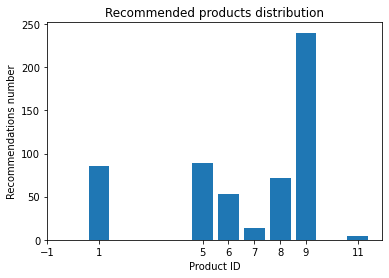

In [7]:
# Recommended products distribution
product_counts = dataset_with_predictions['Alternative recommended accumulation product'].value_counts()

plt.bar(product_counts.index, product_counts.values)

plt.xlabel('Product ID')
plt.ylabel('Recommendations number')
plt.title('Recommended products distribution')

plt.xticks(list(product_counts.index) + [-1])

plt.show()

## Income Products Recommendation

### Basic

**Procedure**

Here, similarly for what we did for the IncomeInvestment, this is our basic recommendation system, in which we take into account the fact that, despite some clients being classified as 1, they have a very low propensity for risk.
Therefore, based on this indicator, we refrain from suggesting any products to these clients, denoting this as '-1' for the product ID.






In [8]:
dataset_with_predictions = pd.read_excel('IncomeInvestment_Predictions.xlsx')
dataset_with_predictions.head()

,Age,FinancialEducation,RiskPropensity,Income,Wealth,Income/Wealth,MLP IncomeInvestment,RF IncomeInvestment,LR IncomeInvestment,KNN IncomeInvestment,SVM IncomeInvestment,GB IncomeInvestment,DT+Ada IncomeInvestment,NB IncomeInvestment,XGB IncomeInvestment,Bagging
0,0.518987,0.119366,0.166095,0.499077,0.447003,0.405424,1,1,1,1,1,1,1,0,1,1
1,0.759494,0.568503,0.617078,0.902076,0.764515,0.381090,1,1,1,1,1,1,1,1,1,1
2,0.582278,0.615310,0.398159,0.658283,0.661516,0.322413,1,1,1,1,1,1,1,1,1,1
3,0.582278,0.545493,0.482318,0.627178,0.580825,0.370585,1,1,1,1,1,1,1,1,0,1
4,0.341772,0.610581,0.531877,0.845886,0.595056,0.487633,0,0,0,0,0,0,0,0,0,0


In [9]:
def get_recommended_product_IncomeBasic(row, product_df):
    if row['Bagging'] == 0:
        return None # Of course we can't recommended an accumulation product if the client doesn't want one
    else:
        # Ensure that filtering is done with appropriate conditions
        valid_products = product_df[(product_df['Type'] == 0) & (product_df['Risk'] <= row['RiskPropensity'])]
        if valid_products.empty:
             return -1
        else:
            # Find the product with the highest risk but still affordable for the client
            return valid_products.loc[valid_products['Risk'].idxmax(), 'IDProduct']

# Apply function to each row of 'dataset_with_predictions'
dataset_with_predictions['Basic recommended income product'] = dataset_with_predictions.apply(lambda row: get_recommended_product_IncomeBasic(row, df_products), axis=1)

# Show first lines to check
dataset_with_predictions.head()

,Age,FinancialEducation,RiskPropensity,Income,Wealth,Income/Wealth,MLP IncomeInvestment,RF IncomeInvestment,LR IncomeInvestment,KNN IncomeInvestment,SVM IncomeInvestment,GB IncomeInvestment,DT+Ada IncomeInvestment,NB IncomeInvestment,XGB IncomeInvestment,Bagging,Basic recommended income product
0,0.518987,0.119366,0.166095,0.499077,0.447003,0.405424,1,1,1,1,1,1,1,0,1,1,10.0
1,0.759494,0.568503,0.617078,0.902076,0.764515,0.381090,1,1,1,1,1,1,1,1,1,1,4.0
2,0.582278,0.615310,0.398159,0.658283,0.661516,0.322413,1,1,1,1,1,1,1,1,1,1,2.0
3,0.582278,0.545493,0.482318,0.627178,0.580825,0.370585,1,1,1,1,1,1,1,1,0,1,4.0
4,0.341772,0.610581,0.531877,0.845886,0.595056,0.487633,0,0,0,0,0,0,0,0,0,0,NaN


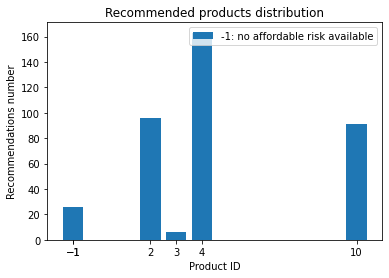

In [10]:
# Recommended products distribution
product_counts = dataset_with_predictions['Basic recommended income product'].value_counts()

plt.bar(product_counts.index, product_counts.values)

plt.xlabel('Product ID')
plt.ylabel('Recommendations number')
plt.title('Recommended products distribution')

plt.xticks(list(product_counts.index) + [-1])
plt.legend(['-1: no affordable risk available'])

plt.show()

### Alternative

**Procedure**

One can notice that there are many clients with no suggested products. However, based on the classification results, these clients are inclined to invest. The only hindrance is their low risk propensity.
Here, adopting the perspective of a real-world bank, we attempt to suggest the product with the lowest risk indicator in the category (product with ID = 3) to clients with excessively low risk propensity.
It's possible that a client might find this product attractive despite their aversion to risk.







In [11]:
def get_recommended_product_IncomeAlternative(row, product_df):
    if row['Bagging'] == 0:
        return None # Of course we can't recommended an accumulation product if the client doesn't want one
    else:
        # Ensure that filtering is done with appropriate conditions
        valid_products = product_df[(product_df['Type'] == 0) & (product_df['Risk'] <= row['RiskPropensity'])]
        if valid_products.empty:
             #No valid type 1 products found within risk propensity, find closest risk above the client's risk propensity
             all_type_0_products = product_df[product_df['Type'] == 0]
             all_type_0_products['RiskDiff'] = abs(all_type_0_products['Risk'] - row['RiskPropensity'])
             closest_product = all_type_0_products.loc[all_type_0_products['RiskDiff'].idxmin()]
             return closest_product['IDProduct']
        else:
            # Find the product with the highest risk but still affordable for the client
            return valid_products.loc[valid_products['Risk'].idxmax(), 'IDProduct']

# Apply function to each row of 'dataset_with_predictions'
dataset_with_predictions['Alternative recommended income product'] = dataset_with_predictions.apply(lambda row: get_recommended_product_IncomeAlternative(row, df_products), axis=1)

# Show first lines to check
dataset_with_predictions.head()

,Age,FinancialEducation,RiskPropensity,Income,Wealth,Income/Wealth,MLP IncomeInvestment,RF IncomeInvestment,LR IncomeInvestment,KNN IncomeInvestment,SVM IncomeInvestment,GB IncomeInvestment,DT+Ada IncomeInvestment,NB IncomeInvestment,XGB IncomeInvestment,Bagging,Basic recommended income product,Alternative recommended income product
0,0.518987,0.119366,0.166095,0.499077,0.447003,0.405424,1,1,1,1,1,1,1,0,1,1,10.0,10.0
1,0.759494,0.568503,0.617078,0.902076,0.764515,0.381090,1,1,1,1,1,1,1,1,1,1,4.0,4.0
2,0.582278,0.615310,0.398159,0.658283,0.661516,0.322413,1,1,1,1,1,1,1,1,1,1,2.0,2.0
3,0.582278,0.545493,0.482318,0.627178,0.580825,0.370585,1,1,1,1,1,1,1,1,0,1,4.0,4.0
4,0.341772,0.610581,0.531877,0.845886,0.595056,0.487633,0,0,0,0,0,0,0,0,0,0,NaN,NaN


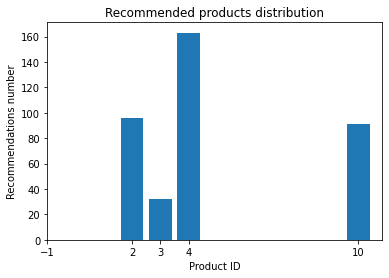

In [12]:
# Recommended products distribution
product_counts = dataset_with_predictions['Alternative recommended income product'].value_counts()

plt.bar(product_counts.index, product_counts.values)

plt.xlabel('Product ID')
plt.ylabel('Recommendations number')
plt.title('Recommended products distribution')

plt.xticks(list(product_counts.index) + [-1])

plt.show()